In [63]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
# Load the dataset
data = pd.read_csv('C://Users//KRISHNA KANTH//Desktop//sabaree_proj//datas.csv')

In [66]:
# Function to convert experience to months
def convert_experience(exp):
    if pd.isnull(exp):
        return None
    exp = str(exp).strip().lower().replace('+', '')  # Remove '+' character
    years = re.findall(r"(\d+\.?\d*)y", exp)
    months = re.findall(r"(\d+\.?\d*)m", exp)
    
    total_months = 0
    if years:
        total_months += float(years[0]) * 12
    if months:
        total_months += float(months[0])
    
    # If no year or month found, assume the entire string is a month count
    if not years and not months:
        try:
            total_months = float(exp)
        except ValueError:
            return None  # If conversion fails, return None
    
    return total_months

In [67]:
# Apply the function to the relevant columns
data['Experience (months)'] = data['Experience'].apply(convert_experience)
data['Relevant exp (months)'] = data['Relavent exp'].apply(convert_experience)

In [68]:
# Handling missing values
data['Experience (months)'].fillna(data['Experience (months)'].median(), inplace=True)
data['Relevant exp (months)'].fillna(data['Relevant exp (months)'].median(), inplace=True)
data['CTC'].fillna(data['CTC'].mode()[0], inplace=True)
data['Expected CTC'].fillna(data['Expected CTC'].mode()[0], inplace=True)
data['Notice period'].fillna(data['Notice period'].mode()[0], inplace=True)
data['Current Company'].fillna('Unknown', inplace=True)
data['Education'].fillna('Unknown', inplace=True)
data['Email ID'].fillna('Unknown', inplace=True)
data['Current Work location'].fillna('Unknown', inplace=True)
data['Week'].fillna(data['Week'].mode()[0], inplace=True)

In [69]:
data.isnull().sum()

S.No                      0
JD-Position               0
Requirment Status        15
Profile shared on         0
Wk                        0
Source                    0
Candidate Name            0
Contact Number            0
Email ID                  0
Education                 0
Current Company           0
Experience               45
Relavent exp             54
CTC                       0
Expected CTC              0
Notice period             0
Current Work location     0
Work Status               0
Date                      0
Week                      0
Experience (months)       0
Relevant exp (months)     0
dtype: int64

In [70]:
data.head(5)

,S.No,JD-Position,Requirment Status,Profile shared on,Wk,Source,Candidate Name,Contact Number,Email ID,Education,...,Relavent exp,CTC,Expected CTC,Notice period,Current Work location,Work Status,Date,Week,Experience (months),Relevant exp (months)
0,1,Diversity,Open,02-01-2024,1,Vignesh,BALA DIVYA SRI,6303751616,bdivyasri62@gmail.com,Diploma CIPET,...,6m,2.4,4,3 month (2month),Hyderabad,Rejected by Panel,08-01-2024,2.0,19.2,6.0
1,2,Diversity,Open,02-01-2024,1,Vignesh,Jayalakshmi. G,9353125205,jaya568766@gmail.com,B.E/Aeronautical engineering,...,1y,1.8,3.25,Immediate Joiner,Viruthunagar,Rejected by Prakash,02-01-2024,1.0,15.6,12.0
2,3,Diversity,Open,02-01-2024,1,Vignesh,Soniya Gandhi D,6369512619,soniyagandhi129@gmail.com,B.E/Aeronautical engineering,...,6m,1.8,3.25,15 to 20 days,Bangalore,Rejected by Prakash,02-01-2024,1.0,6.0,6.0
3,4,Diversity,Open,02-01-2024,1,Vignesh,ANKILA V BALU,7306918383,ankilavbalu97@gmail.com,B.E/Aeronautical engineering,...,8m,2.5,3.75,Immediate Joiner,Bangalore,Rejected by Prakash,02-01-2024,1.0,21.6,8.0
4,5,JIRA,Open,04-01-2024,1,Vignesh,Sharath Kumar,7569899937,ganamukalasharath@gmail.com,B.E (Mech),...,1+,3.9,5LPA,1 month,AP,Onhold,04-01-2024,1.0,1.0,1.0


In [71]:
columns_to_encode = ['JD-Position', 'Requirment Status','Source','Education','Experience','Relavent exp','CTC','Expected CTC','Notice period','Current Work location','Work Status','Date','Profile shared on'] 

In [72]:
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [73]:
data=data.drop(columns=['Candidate Name','Contact Number','Email ID','Current Company','S.No'])

In [74]:
data.head

<bound method NDFrame.head of      JD-Position  Requirment Status  Profile shared on  Wk  Source  Education  \
0             32                  0                  3   1      34        118   
1             32                  0                  3   1      34         49   
2             32                  0                  3   1      34         49   
3             32                  0                  3   1      34         49   
4             47                  0                  9   1      34         18   
..           ...                ...                ...  ..     ...        ...   
474           57                  0                 65  21       2         23   
475           57                  0                 65  21       2         23   
476           44                  0                 65  21       2         23   
477           57                  0                 65  21       2         23   
478           57                  0                 65  21       2        130  

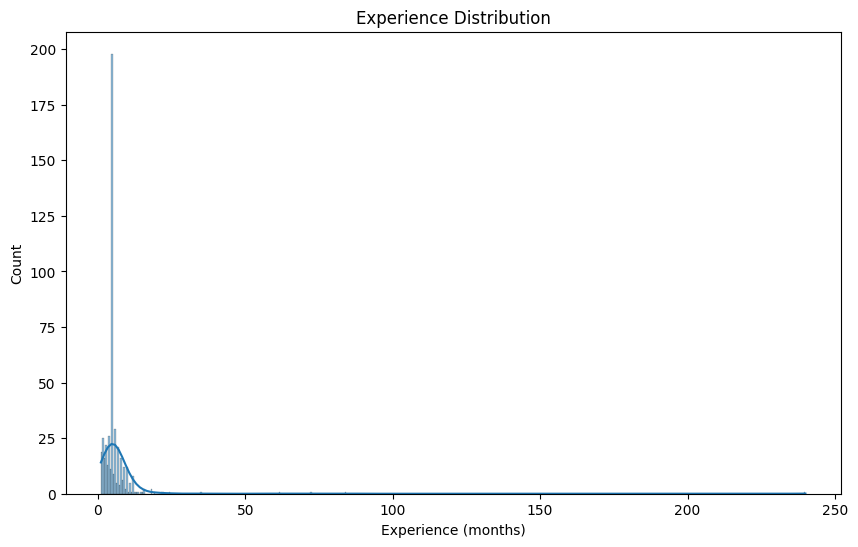

In [75]:
# Data distribution plots
plt.figure(figsize=(10, 6))
sns.histplot(data['Experience (months)'], kde=True)
plt.title('Experience Distribution')
plt.show()

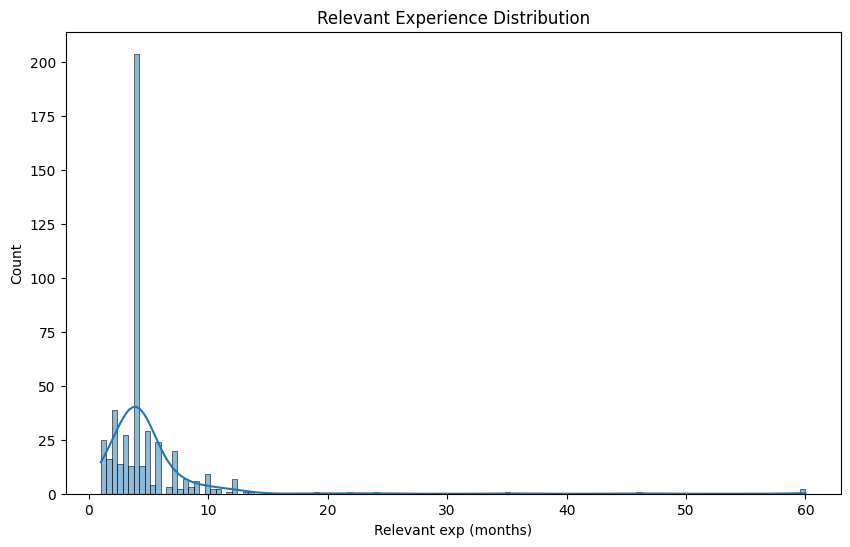

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Relevant exp (months)'], kde=True)
plt.title('Relevant Experience Distribution')
plt.show()

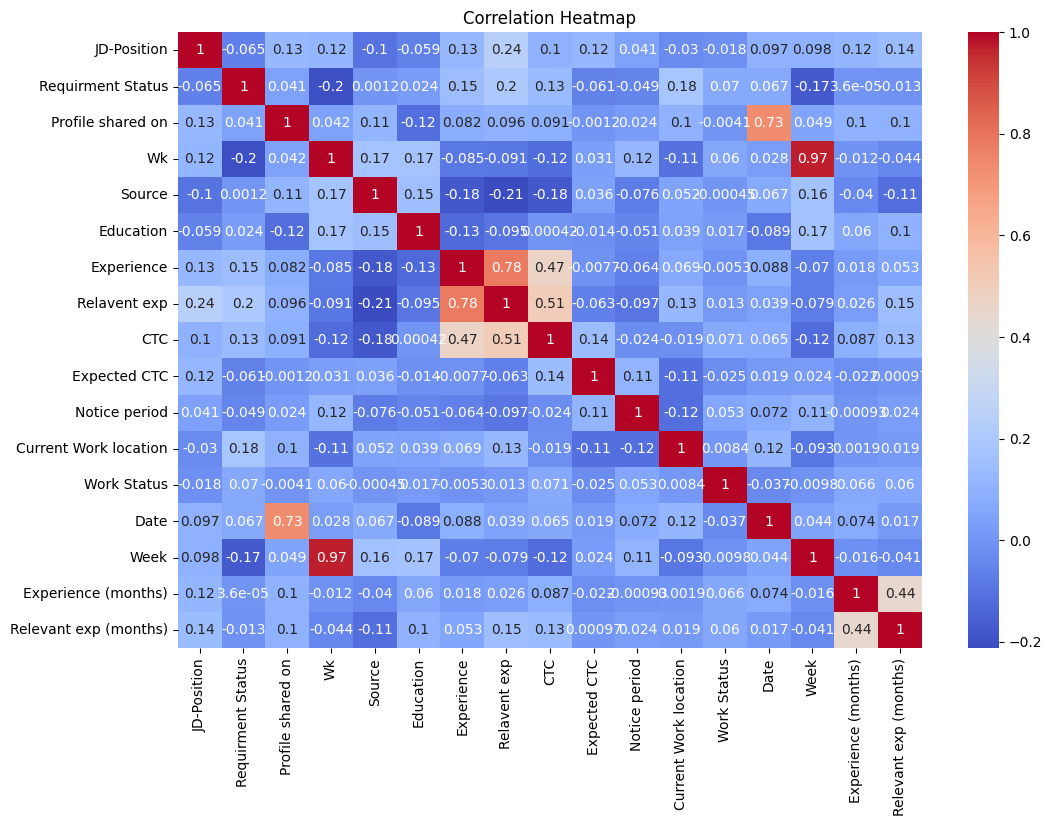

In [77]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [78]:
data.head(1)

,JD-Position,Requirment Status,Profile shared on,Wk,Source,Education,Experience,Relavent exp,CTC,Expected CTC,Notice period,Current Work location,Work Status,Date,Week,Experience (months),Relevant exp (months)
0,32,0,3,1,34,118,11,125,24,57,48,22,14,22,2.0,19.2,6.0


In [80]:
X = data.drop(columns=['JD-Position','Profile shared on', 'Date','Requirment Status','Wk','Source'])
y = data['CTC']

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [84]:
# Predict on the test set
y_pred = model.predict(X_test)

In [85]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.19791666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.50      0.25      0.33         4
          25       0.00      0.00      0.00         3
          26       0.00     

c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

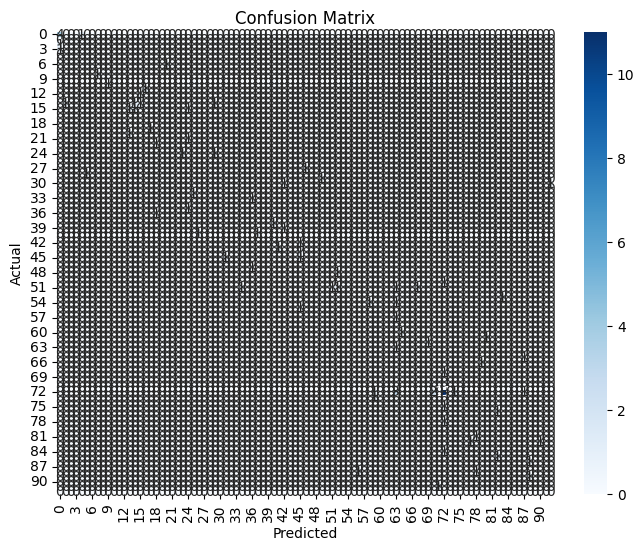

In [88]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

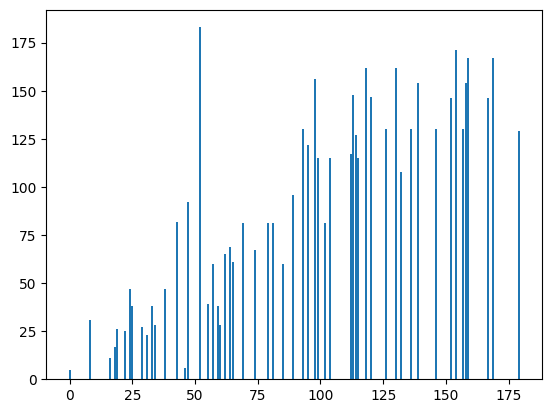

In [90]:
plt.bar(y_test,y_pred)
plt.show()